<a href="https://colab.research.google.com/github/gkunal8019/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #df1 = pd.read_csv("/content/SeoulBikeData.csv",encoding = 'latin',parse_dates=['Date'])

In [2]:
df = pd.read_csv("/content/SeoulBikeData.csv",encoding = 'unicode_escape')

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78,100,181,460,930,490
Hour,0,1,2,3,4,5,6,7,8,9
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0,-6.4,-6.6,-7.4,-7.6,-6.5
Humidity(%),37,38,39,40,36,37,35,38,37,27
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3,1.5,1.3,0.9,1.1,0.5
Visibility (10m),2000,2000,2000,2000,2000,2000,2000,2000,2000,1928
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6,-18.7,-19.5,-19.3,-19.8,-22.4
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.23
Rainfall(mm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.tail(10).T

,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
Date,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018
Rented Bike Count,761,768,837,1047,1384,1003,764,694,712,584
Hour,14,15,16,17,18,19,20,21,22,23
Temperature(°C),7.8,7.0,7.2,6.0,4.7,4.2,3.4,2.6,2.1,1.9
Humidity(%),20,20,23,29,34,34,37,39,41,43
Wind speed (m/s),2.2,3.3,1.5,2.1,1.9,2.6,2.3,0.3,1.0,1.3
Visibility (10m),2000,1994,1945,1877,1661,1894,2000,1968,1859,1909
Dew point temperature(°C),-13.8,-14.4,-12.6,-10.7,-9.8,-10.3,-9.9,-9.9,-9.8,-9.3
Solar Radiation (MJ/m2),1.67,1.21,0.72,0.23,0.0,0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df)

8760

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## *There is no missing values*

In [5]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [6]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
df.columns 

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# Renaming Columns
df.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

### convertion date time format

In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
# Extracting new features from date and hour column
df['weekend'] = df['date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df['timeshift'] = df['hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))
# Dropping the Date column
df.drop(columns=['date'], inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bike_count       8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temp             8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind             8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   dew_temp         8760 non-null   float64
 7   sunlight         8760 non-null   float64
 8   rain             8760 non-null   float64
 9   snow             8760 non-null   float64
 10  season           8760 non-null   object 
 11  holiday          8760 non-null   object 
 12  functioning_day  8760 non-null   object 
 13  weekend          8760 non-null   int64  
 14  timeshift        8760 non-null   object 
dtypes: float64(6), int64(5), object(4)
memory usage: 1.0+ MB


In [11]:
# Checking unique value
df.apply(lambda x: len(x.unique()))

bike_count         2166
hour                 24
temp                546
humidity             90
wind                 65
visibility         1789
dew_temp            556
sunlight            345
rain                 61
snow                 51
season                4
holiday               2
functioning_day       2
weekend               2
timeshift             3
dtype: int64

In [12]:
# Lets take care of the categorical features
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['season', 'holiday', 'functioning_day', 'timeshift']

In [16]:
# Checking unique value with their counts in categorical features
for colm in categorical_features:
  print(df[colm].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: season, dtype: int64
No Holiday    8328
Holiday        432
Name: holiday, dtype: int64
Yes    8465
No      295
Name: functioning_day, dtype: int64
day        3650
night      2555
evening    2555
Name: timeshift, dtype: int64


One hot encoding

In [26]:
encoding = {'holiday':{'holiday':1,'No Holiday':0},
            'functioning_day':{'Yes':1,'No':0},
            'timeshift': {'night':0, 'day':1, 'evening':2}}

df1 = df.replace(encoding)
df1

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,weekend,timeshift
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,0,2
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,0,2
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,0,2
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,0,2


In [ ]:
%matplotlib inline
import matplotlib as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8be4710850>,
      dtype=object)

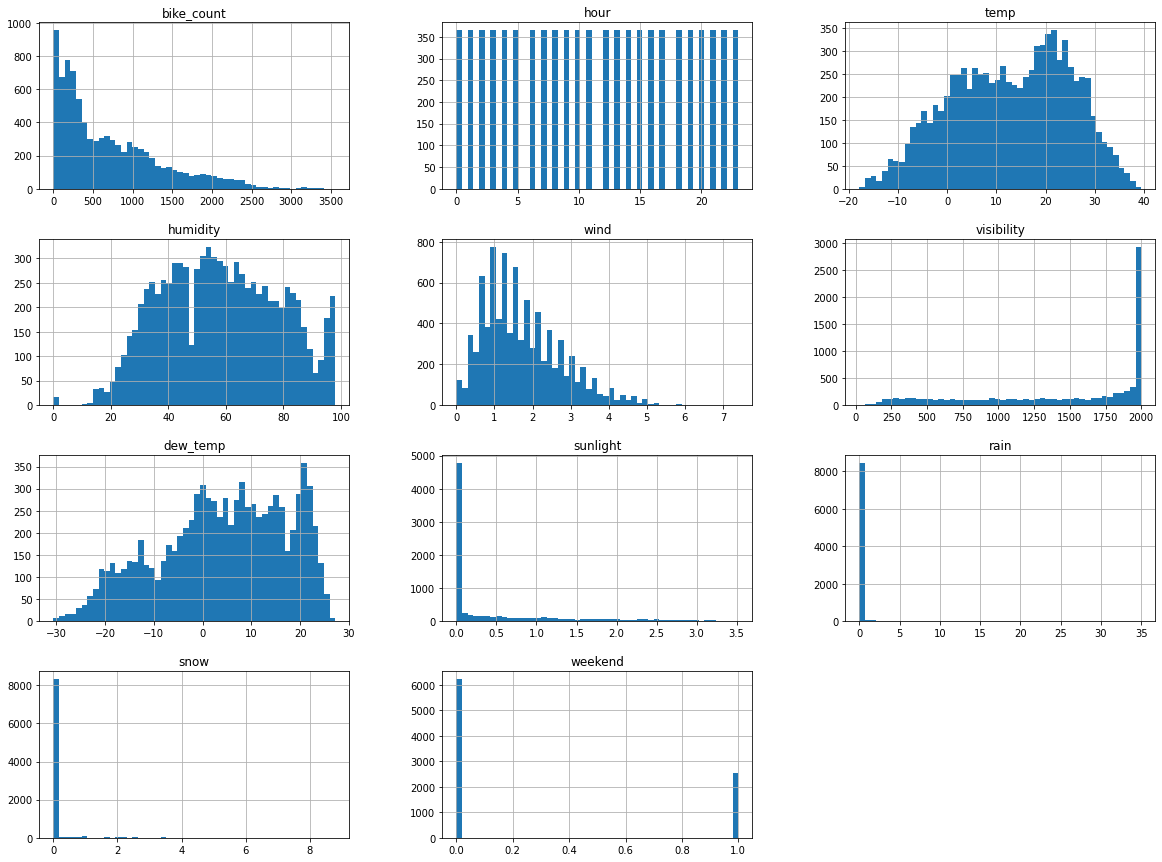

In [ ]:
df.hist(bins=50,figsize=(20,15))

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df,, test_size=0.25, random_state=0)
#print(X_train.shape)
#print(X_test.shape)

In [ ]:
df.columns.values

array(['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility',
       'dew_temp', 'sunlight', 'rain', 'snow', 'season', 'holiday',
       'functioning_day', 'weekend', 'timeshift'], dtype=object)

In [ ]:
df.corr()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,weekend
bike_count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-3.225936e-02
hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-2.300554e-17
temp,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-1.297241e-02
humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-3.674982e-02
wind,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-2.239107e-02
visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,3.064954e-02
dew_temp,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-2.896569e-02
sunlight,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,8.271095e-03
rain,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.427960e-02
snow,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-2.255705e-02


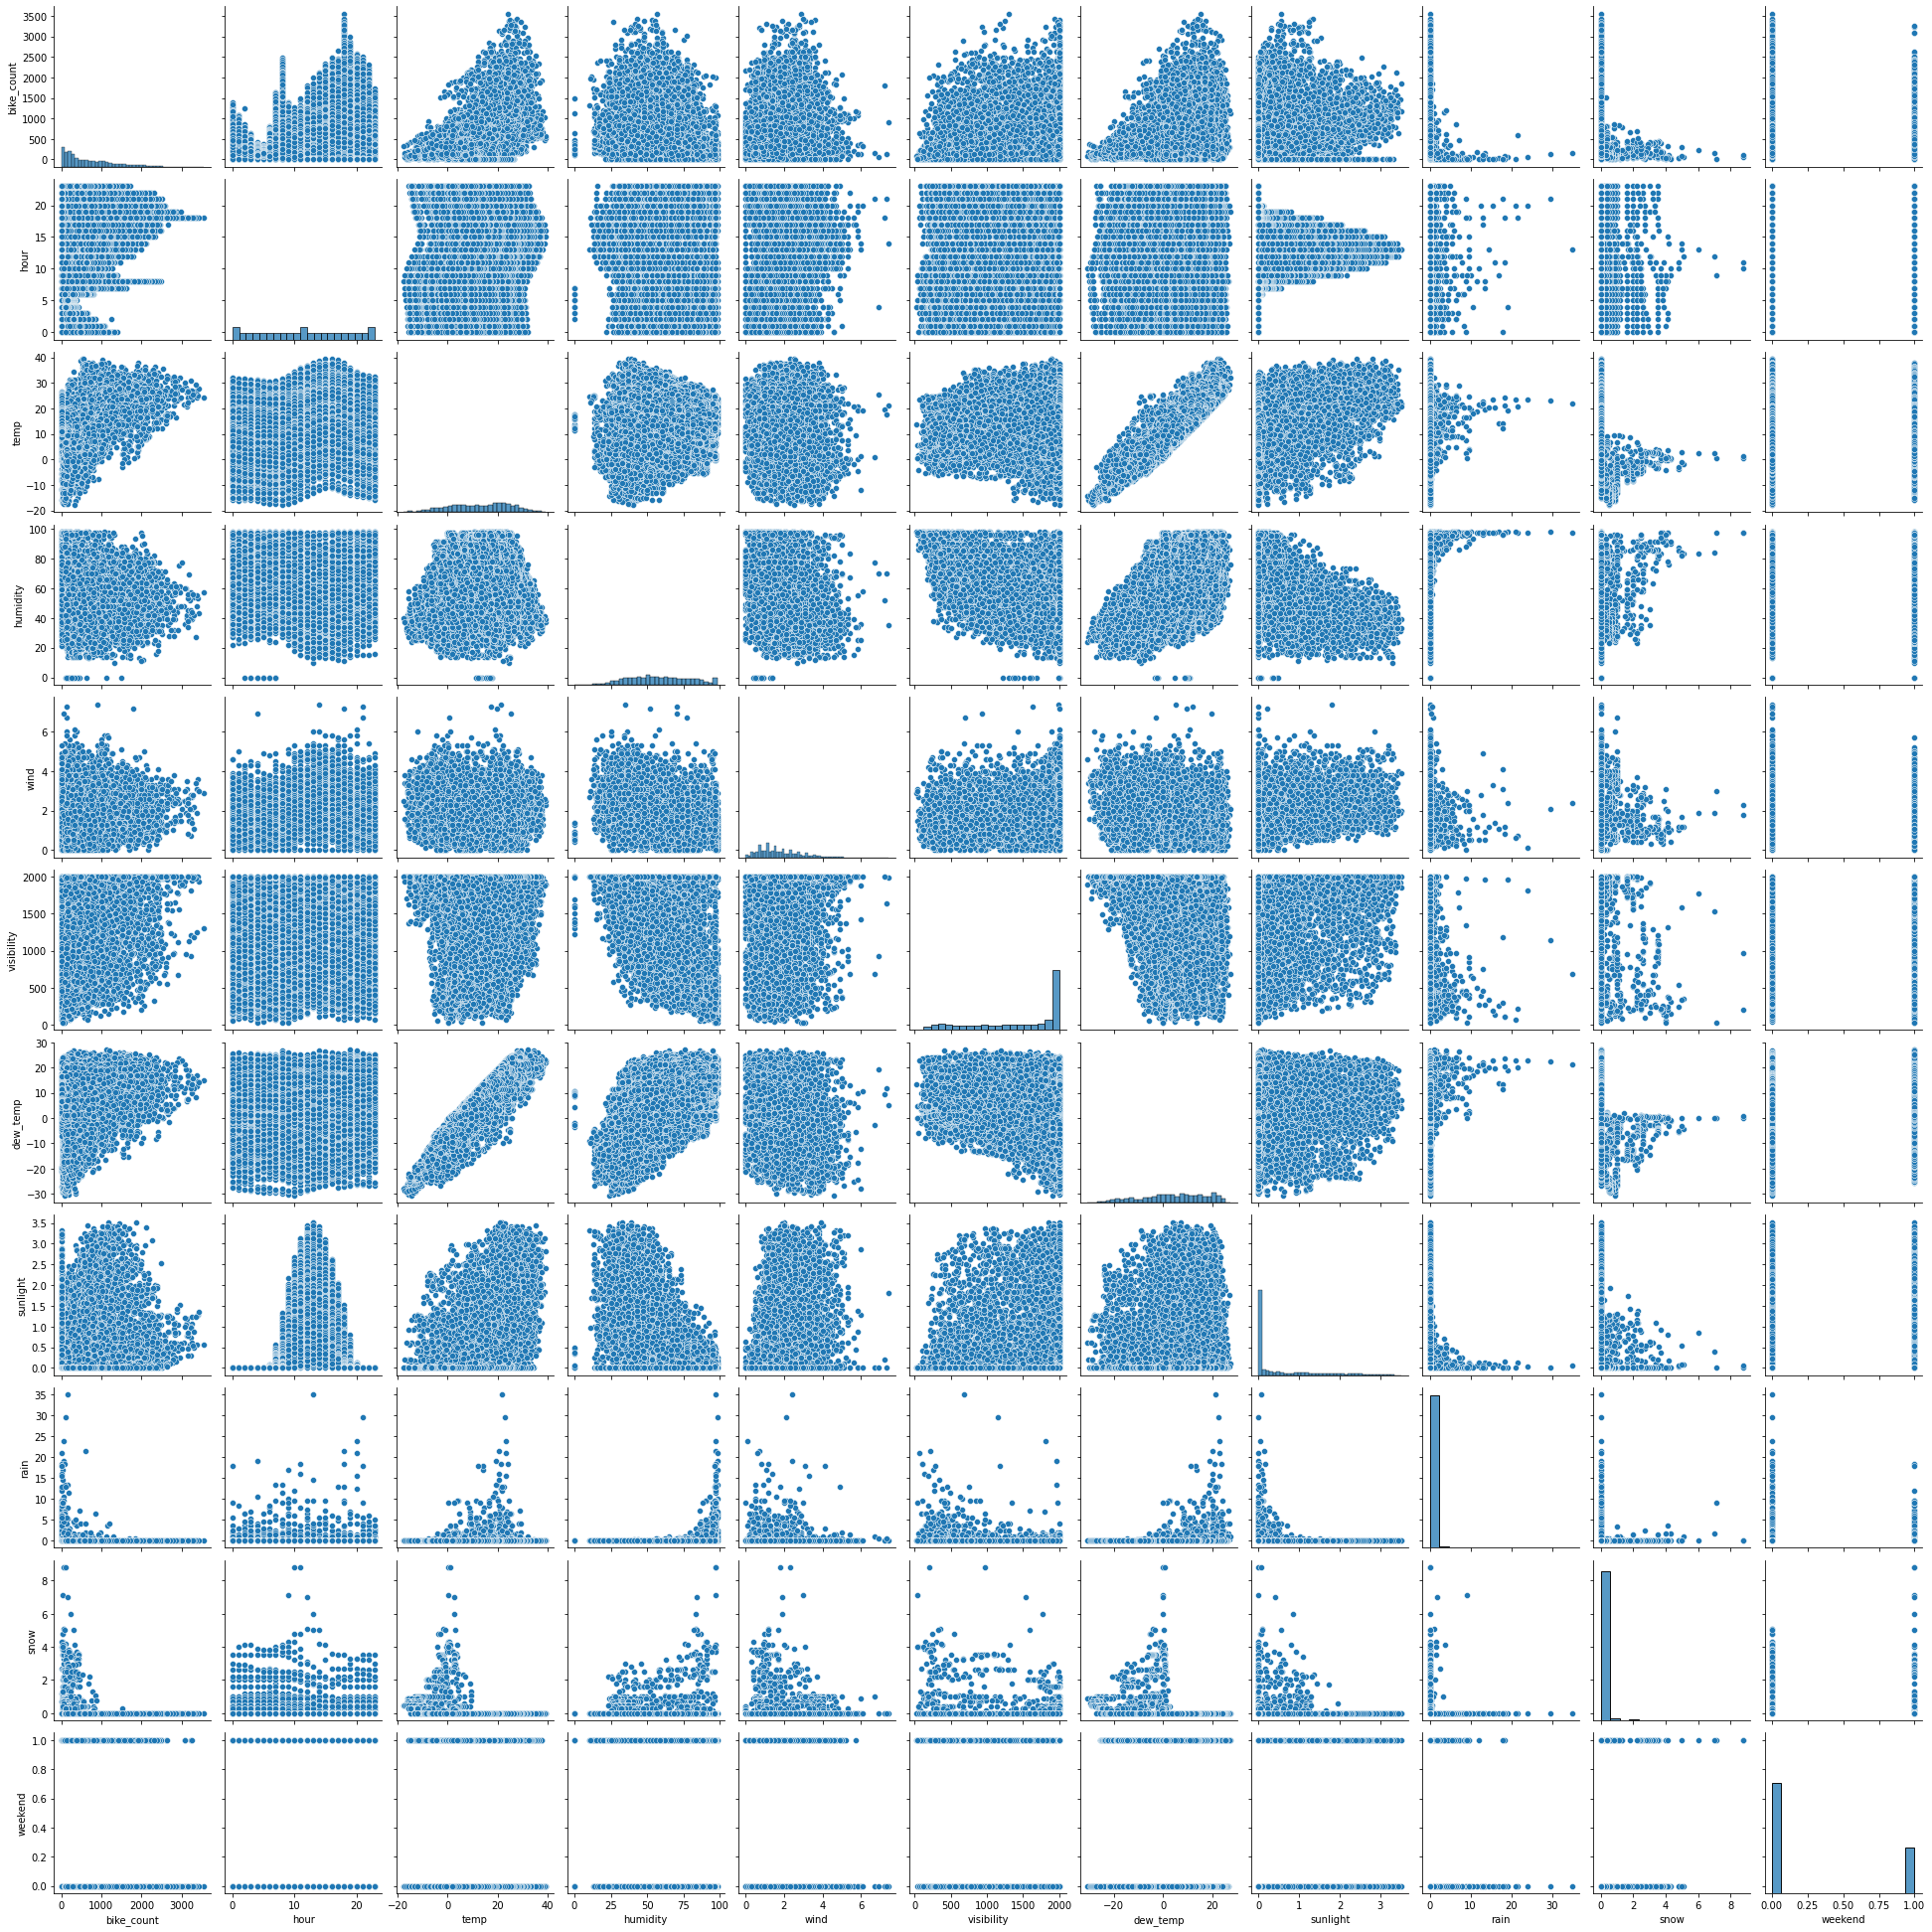

In [ ]:
sns.pairplot(df)

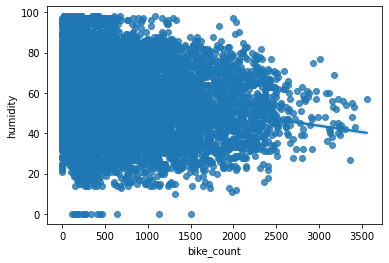

In [ ]:
sns.regplot(x='bike_count',y='humidity',data=df)

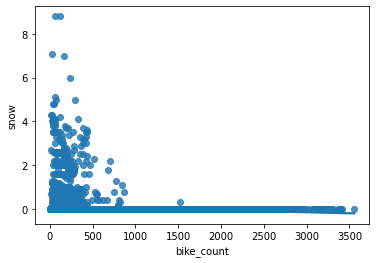

In [ ]:
sns.regplot(x='bike_count',y='snow',data=df)

When Rented Bike Count increases then Snowfall (cm) is decreases.
It means Rented Bike Count is negatively correlated 

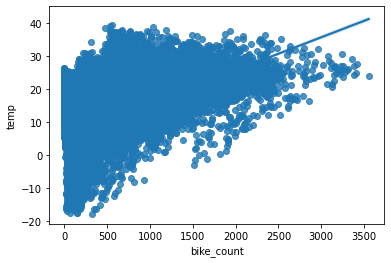

In [ ]:
sns.regplot(x='bike_count',y='temp',data=df)

Swapping the columns

In [ ]:
titel = list(df.columns)
titel

['bike_count',
 'hour',
 'temp',
 'humidity',
 'wind',
 'visibility',
 'dew_temp',
 'sunlight',
 'rain',
 'snow',
 'season',
 'holiday',
 'functioning_day',
 'weekend',
 'timeshift']

In [ ]:
titel[1],titel[13] = titel[13],titel[1]
titel

['bike_count',
 'weekend',
 'temp',
 'humidity',
 'wind',
 'visibility',
 'dew_temp',
 'sunlight',
 'rain',
 'snow',
 'season',
 'holiday',
 'functioning_day',
 'hour',
 'timeshift']

In [ ]:
df= df[titel]
df


,bike_count,weekend,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,hour,timeshift
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night
1,204,0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,night
2,173,0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2,night
3,107,0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,night
4,78,0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,19,evening
8756,764,0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,20,evening
8757,694,0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,21,evening
8758,712,0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,22,evening


## **DEPENDENT AND INDIPENDANT FEATURES**

**Swapping the columns**

In [ ]:
x = df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
x.head()

,bike_count,weekend,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,hour
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,204,0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,173,0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2
3,107,0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3
4,78,0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4


In [ ]:
y.head()

0    night
1    night
2    night
3    night
4    night
Name: timeshift, dtype: object

train test splite

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train

,bike_count,weekend,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,hour
1444,33,0,-11.1,50,1.2,1986,-19.4,0.00,0.0,0.0,Winter,No Holiday,Yes,4
1652,218,0,-5.8,44,2.1,1994,-16.1,0.00,0.0,0.0,Winter,No Holiday,Yes,20
7496,0,0,11.4,66,0.8,1991,5.2,0.18,0.0,0.0,Autumn,Holiday,No,8
1893,133,1,-2.3,38,2.3,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes,21
3880,1496,0,19.1,54,3.2,542,9.5,0.94,0.0,0.0,Spring,No Holiday,Yes,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1507,0,29.9,74,2.0,1201,24.7,0.00,0.0,0.0,Summer,No Holiday,Yes,22
5191,828,0,23.5,90,0.5,445,21.7,0.05,0.5,0.0,Summer,No Holiday,Yes,7
5390,999,0,29.5,62,2.7,1941,21.4,1.79,0.0,0.0,Summer,No Holiday,Yes,14
860,322,0,-3.4,51,1.1,1391,-12.1,0.00,0.0,0.0,Winter,No Holiday,Yes,20


In [ ]:
x_test

,bike_count,weekend,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,hour
6056,1728,0,27.2,69,1.8,1999,21.0,0.70,0.0,0.0,Summer,No Holiday,Yes,8
5556,822,0,32.6,51,2.1,800,21.1,3.21,0.0,0.0,Summer,No Holiday,Yes,12
5990,658,1,34.0,50,1.2,1744,22.1,1.68,0.0,0.0,Summer,No Holiday,Yes,14
7674,2716,0,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,Autumn,No Holiday,Yes,18
3319,1083,0,6.4,51,1.0,1398,-3.0,0.19,0.0,0.0,Spring,No Holiday,Yes,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,1581,1,19.1,18,1.2,2000,-5.8,0.00,0.0,0.0,Spring,No Holiday,Yes,20
1912,404,1,5.1,16,1.8,1998,-18.7,1.17,0.0,0.0,Winter,No Holiday,Yes,16
3692,1401,0,12.6,47,3.2,1935,1.5,0.02,0.0,0.0,Spring,No Holiday,Yes,20
599,169,0,-1.0,55,1.9,2000,-8.9,0.00,0.0,0.0,Winter,Holiday,Yes,23


MODEL BUILDING

In [ ]:
regression=LinearRegression()

In [ ]:
regression.fit(x_train,y_train)

ValueError: ignored